In [2]:
%load_ext zipline


After you installed zipline you should be able to execute the following from your command line (e.g. cmd.exe on Windows, or the Terminal app on OSX):

In [3]:
!zipline run --help

Usage: zipline run [OPTIONS]

  Run a backtest for the given algorithm.

Options:
  -f, --algofile FILENAME         The file that contains the algorithm to run.
  -t, --algotext TEXT             The algorithm script to run.
  -D, --define TEXT               Define a name to be bound in the namespace
                                  before executing the algotext. For example
                                  '-Dname=value'. The value may be any python
                                  expression. These are evaluated in order so
                                  they may refer to previously defined names.

  --data-frequency [minute|daily]
                                  The data frequency of the simulation.
                                  [default: daily]

  --capital-base FLOAT            The starting capital for the simulation.
                                  [default: 10000000.0]

  -b, --bundle BUNDLE-NAME        The data bundle to use for the simulation.
                    

In [4]:
%%zipline --start 2015-1-1 --end 2021-02-27 --capital-base 10000 --bundle custom-bundle -o perf_ipython.pickle


import talib
from zipline.api import order_target, record, symbol, order_target_percent, set_benchmark


# Setup our variables
def initialize(context):
    
    # what stock to trade - FAANG in this example
    # stocklist = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']
    stocklist = ['SPY', 'ARKK', 'VNQ', 'VNQI']
    set_benchmark(symbol('SPY'))

    # make a list of symbols for the list of tickers
    context.stocks = [symbol(s) for s in stocklist]
    
    # create equal weights of each stock to hold in our portfolio
    context.target_pct_per_stock = 1.0 / len(context.stocks)
    
    # create initial RSI threshold values for low (oversold and buy signal) and high (overbought and sell signal)
    context.LOW_RSI = 30
    context.HIGH_RSI = 70

# Rebalance daily.
def handle_data(context, data):
    
    # Load historical pricing data for the stocks, using daily frequncy and a rolling 20 days
    prices = data.history(context.stocks, 'price', bar_count=20, frequency="1d")
    
    rsis = {}
    # print(prices)
    # Loop through our list of stocks
    for stock in context.stocks:
        # Get the rsi of this stock.
        # print(prices[stock])
        rsi = talib.RSI(prices[stock].values, timeperiod=14)[-1]
        rsis[stock] = rsi
        
        current_position = context.portfolio.positions[stock].amount
        
        # RSI is above 70 and we own shares, time to sell
        if rsi > context.HIGH_RSI and current_position > 0 and data.can_trade(stock):
            order_target(stock, 0)
   
        # RSI is below 30 and we don't have any shares, time to buy
        elif rsi < context.LOW_RSI and current_position == 0 and data.can_trade(stock):
            order_target_percent(stock, context.target_pct_per_stock)

    # record the current RSI values of each stock for later ispection
    record(spy_rsi=rsis[symbol('SPY')],
           arkk_rsi=rsis[symbol('ARKK')],
           vnq_rsi=rsis[symbol('VNQ')],
           vnqi_rsi=rsis[symbol('VNQI')])


,algo_volatility,algorithm_period_return,alpha,arkk_rsi,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,sortino,spy_rsi,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return,vnq_rsi,vnqi_rsi
2015-01-02 21:00:00+00:00,NaN,0.000000,NaN,50.336238,-0.000536,NaN,NaN,0.0,10000.00000,0.00,...,NaN,46.473068,10000.00000,0.00,0.00,1,[],0.0,60.037820,43.259707
2015-01-05 21:00:00+00:00,0.000000,0.000000,0.000000,41.532002,-0.018584,0.196683,0.000000,0.0,10000.00000,0.00,...,NaN,38.764047,10000.00000,0.00,0.00,2,[],0.0,64.261644,39.689344
2015-01-06 21:00:00+00:00,0.000000,0.000000,0.000000,45.456311,-0.027832,0.139080,0.000000,0.0,10000.00000,0.00,...,NaN,37.929951,10000.00000,0.00,0.00,3,[],0.0,66.315754,42.928572
2015-01-07 21:00:00+00:00,0.000000,0.000000,0.000000,47.473922,-0.015718,0.206968,0.000000,0.0,10000.00000,0.00,...,NaN,45.016184,10000.00000,0.00,0.00,4,[],0.0,69.990841,51.533794
2015-01-08 21:00:00+00:00,0.000000,0.000000,0.000000,56.211122,0.001750,0.236053,0.000000,0.0,10000.00000,0.00,...,NaN,56.970832,10000.00000,0.00,0.00,5,[],0.0,71.196887,57.127401
2015-01-09 21:00:00+00:00,0.000000,0.000000,0.000000,52.780610,-0.006279,0.218123,0.000000,0.0,10000.00000,0.00,...,NaN,52.259655,10000.00000,0.00,0.00,6,[],0.0,70.206814,57.126566
2015-01-12 21:00:00+00:00,0.000000,0.000000,0.000000,57.615381,-0.014061,0.203329,0.000000,0.0,10000.00000,0.00,...,NaN,53.805996,10000.00000,0.00,0.00,7,[],0.0,75.535769,60.352167
2015-01-13 21:00:00+00:00,0.000000,0.000000,0.000000,58.582396,-0.016834,0.188309,0.000000,0.0,10000.00000,0.00,...,NaN,54.692171,10000.00000,0.00,0.00,8,[],0.0,80.333329,70.857201
2015-01-14 21:00:00+00:00,0.000000,0.000000,0.000000,62.023774,-0.022768,0.177399,0.000000,0.0,10000.00000,0.00,...,NaN,54.331926,10000.00000,0.00,0.00,9,[],0.0,82.459744,72.203182
2015-01-15 21:00:00+00:00,0.000000,0.000000,0.000000,50.851596,-0.031721,0.170564,0.000000,0.0,10000.00000,0.00,...,NaN,44.587304,10000.00000,0.00,0.00,10,[],0.0,79.888635,69.548157


In [5]:
import pickle
import pandas as pd
import pyfolio as pf
import seaborn as sns
from matplotlib import pyplot as plt
sns.set() # Setting seaborn as default style even if use only matplotlib


WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [6]:
df = pd.read_pickle('./perf_ipython.pickle')
df.columns

Index(['algo_volatility', 'algorithm_period_return', 'alpha', 'arkk_rsi',
       'benchmark_period_return', 'benchmark_volatility', 'beta',
       'capital_used', 'ending_cash', 'ending_exposure', 'ending_value',
       'excess_return', 'gross_leverage', 'long_exposure', 'long_value',
       'longs_count', 'max_drawdown', 'max_leverage', 'net_leverage', 'orders',
       'period_close', 'period_label', 'period_open', 'pnl', 'portfolio_value',
       'positions', 'returns', 'sharpe', 'short_exposure', 'short_value',
       'shorts_count', 'sortino', 'spy_rsi', 'starting_cash',
       'starting_exposure', 'starting_value', 'trading_days', 'transactions',
       'treasury_period_return', 'vnq_rsi', 'vnqi_rsi'],
      dtype='object')

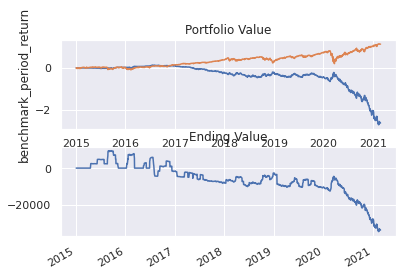

In [8]:
fig, ax = plt.subplots(2,1)
sns.lineplot(ax=ax[0], x=df.index, y=df['algorithm_period_return'] )
sns.lineplot(ax=ax[0], x=df.index, y=df['benchmark_period_return'] )

ax[0].set_title('Portfolio Value')

ax[1].set_title('Ending Value')
df.ending_value.plot(ax=ax[1])



In [38]:
%%zipline --start 2015-1-1 --end 2020-10-26 --capital-base 10000 --bundle custom-bundle -o perf_ipython.pickle


import talib
from zipline.api import order_target, record, symbol, order_target_percent, set_benchmark


# Setup our variables
def initialize(context):
    
    # what stock to trade - FAANG in this example
    # stocklist = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']
    stocklist = ['SPY']
    set_benchmark(symbol('SPY'))

    # make a list of symbols for the list of tickers
    context.stocks = [symbol(s) for s in stocklist]
    
    # create equal weights of each stock to hold in our portfolio
    context.target_pct_per_stock = 1.0 / len(context.stocks)
    
    # create initial RSI threshold values for low (oversold and buy signal) and high (overbought and sell signal)
    context.LOW_RSI = 30
    context.HIGH_RSI = 70

# Rebalance daily.
def handle_data(context, data):
    
    # Load historical pricing data for the stocks, using daily frequncy and a rolling 20 days
    prices = data.history(context.stocks, 'price', bar_count=20, frequency="1d")
    
    rsis = {}
    # print(prices)
    # Loop through our list of stocks
    for stock in context.stocks:
        # Get the rsi of this stock.
        # print(prices[stock])
        rsi = talib.RSI(prices[stock].values, timeperiod=14)[-1]
        rsis[stock] = rsi
        
        current_position = context.portfolio.positions[stock].amount
        
        # RSI is above 70 and we own shares, time to sell
        if rsi > context.HIGH_RSI and current_position > 0 and data.can_trade(stock):
            order_target(stock, 0)
   
        # RSI is below 30 and we don't have any shares, time to buy
        elif rsi < context.LOW_RSI and current_position == 0 and data.can_trade(stock):
            order_target_percent(stock, context.target_pct_per_stock)


,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2015-01-02 21:00:00+00:00,NaN,0.000000,NaN,-0.000534,NaN,NaN,0.0,10000.000000,0.0,0.0,...,0.0,0.0,0,NaN,10000.000000,0.0,0.0,1,[],0.0
2015-01-05 21:00:00+00:00,0.000000,0.000000,0.000000,-0.018582,0.196704,0.000000,0.0,10000.000000,0.0,0.0,...,0.0,0.0,0,NaN,10000.000000,0.0,0.0,2,[],0.0
2015-01-06 21:00:00+00:00,0.000000,0.000000,0.000000,-0.027829,0.139096,0.000000,0.0,10000.000000,0.0,0.0,...,0.0,0.0,0,NaN,10000.000000,0.0,0.0,3,[],0.0
2015-01-07 21:00:00+00:00,0.000000,0.000000,0.000000,-0.015712,0.206987,0.000000,0.0,10000.000000,0.0,0.0,...,0.0,0.0,0,NaN,10000.000000,0.0,0.0,4,[],0.0
2015-01-08 21:00:00+00:00,0.000000,0.000000,0.000000,0.001754,0.236041,0.000000,0.0,10000.000000,0.0,0.0,...,0.0,0.0,0,NaN,10000.000000,0.0,0.0,5,[],0.0
2015-01-09 21:00:00+00:00,0.000000,0.000000,0.000000,-0.006274,0.218112,0.000000,0.0,10000.000000,0.0,0.0,...,0.0,0.0,0,NaN,10000.000000,0.0,0.0,6,[],0.0
2015-01-12 21:00:00+00:00,0.000000,0.000000,0.000000,-0.014061,0.203327,0.000000,0.0,10000.000000,0.0,0.0,...,0.0,0.0,0,NaN,10000.000000,0.0,0.0,7,[],0.0
2015-01-13 21:00:00+00:00,0.000000,0.000000,0.000000,-0.016833,0.188306,0.000000,0.0,10000.000000,0.0,0.0,...,0.0,0.0,0,NaN,10000.000000,0.0,0.0,8,[],0.0
2015-01-14 21:00:00+00:00,0.000000,0.000000,0.000000,-0.022769,0.177398,0.000000,0.0,10000.000000,0.0,0.0,...,0.0,0.0,0,NaN,10000.000000,0.0,0.0,9,[],0.0
2015-01-15 21:00:00+00:00,0.000000,0.000000,0.000000,-0.031723,0.170563,0.000000,0.0,10000.000000,0.0,0.0,...,0.0,0.0,0,NaN,10000.000000,0.0,0.0,10,[],0.0
